In [1]:
import sys
sys.path.append('../pcqc')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pcqc import *

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [17]:
import pickle

In [21]:
import scanpy as sc

### Import Data

In [4]:
cbmc_df = pd.read_csv('data/filtered_cbmc_assay.csv')
cbmc_df.index = cbmc_df['Unnamed: 0']
cbmc_df.drop(columns = 'Unnamed: 0',inplace = True)
cbmc_df = cbmc_df.transpose()
cbmc_df.head()

Unnamed: 0,A4GALT,ABCB10,ABCC3,ABCG2,ABI3,AC002454.1,AC004381.6,AC004791.2,AC005339.2,AC005356.1,...,MOUSE-Rtn4,MOUSE-Ppp1ca,MOUSE-Cald1,MOUSE-Rps26,MOUSE-Ctsl,MOUSE-Tnfrsf12a,MOUSE-Esd,MOUSE-Acta2,MOUSE-Arpc2,MOUSE-Calr
CTGTTTACACCGCTAG,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.666522,2.806501,4.390655,2.338495,4.236169,3.291269,3.338256,1.181500,3.575336,2.491014
CTCTACGGTGTGGCTC,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.431149,3.219714,3.572171,3.176395,3.501385,3.099354,3.375631,3.738814,3.165883,2.803176
AGCAGCCAGGCTCATT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.810213,3.309678,3.658060,3.236889,3.957931,3.465798,2.787275,2.762576,3.510315,3.762173
GAATAAGAGATCCCAT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.686728,3.248412,3.565898,3.485953,3.325856,2.842990,3.483046,2.815389,3.319044,4.037947
GTGCATAGTCATGCAT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.561990,3.678177,4.183636,3.325419,2.450436,2.636636,1.886444,6.334562,3.971224,2.929176


### Fit pca method on data

In [5]:
pca = PC_Cluster(n_pcs = 100)
pca.fit(cbmc_df.values)
pca.norm_eigenvalues[0:20]

array([0.06562919, 0.03916874, 0.02691411, 0.01778673, 0.01531372,
       0.01340929, 0.01227411, 0.0069056 , 0.00643235, 0.00514619,
       0.00342394, 0.00324247, 0.00302587, 0.00232158, 0.00222412,
       0.00214154, 0.001905  , 0.00181226, 0.00176268, 0.00166096])

In [6]:
pca.pc_distribution()
pca.df_pca_dist.head()

,PC_Dist_0,PC_Dist_1,PC_Dist_2,PC_Dist_3,PC_Dist_4,PC_Dist_5,PC_Dist_6,PC_Dist_7,PC_Dist_8,PC_Dist_9,...,PC_Dist_90,PC_Dist_91,PC_Dist_92,PC_Dist_93,PC_Dist_94,PC_Dist_95,PC_Dist_96,PC_Dist_97,PC_Dist_98,PC_Dist_99
0,0.000109,1.017151e-06,3.472080e-08,1.432048e-08,5.050533e-09,1.319299e-07,4.266750e-08,2.720950e-08,2.365754e-10,3.106800e-08,...,2.198981e-09,1.751499e-08,2.922613e-11,2.244439e-09,5.922574e-09,1.228976e-08,4.705107e-09,1.509249e-09,1.960247e-09,2.843155e-09
1,0.000106,1.330582e-06,4.509797e-07,9.829682e-10,4.407147e-08,1.592044e-06,2.385236e-07,3.358053e-08,5.075646e-09,1.728385e-08,...,9.969644e-10,2.087265e-09,8.196951e-09,2.109240e-09,4.168864e-08,2.796389e-08,5.889346e-11,5.691022e-09,1.084981e-09,4.350326e-09
2,0.000112,1.352623e-06,2.310197e-07,2.536909e-08,2.595612e-08,3.811017e-07,1.088577e-10,1.922921e-08,3.803947e-08,2.003366e-09,...,2.840543e-09,2.023886e-08,1.010993e-12,2.542236e-08,3.257220e-09,9.102833e-09,4.732683e-08,1.206457e-08,1.393310e-10,4.298715e-09
3,0.000108,1.341827e-06,1.159750e-07,2.082525e-08,2.928377e-08,4.010636e-07,3.102027e-10,6.158710e-09,1.380496e-10,7.409330e-13,...,1.377265e-08,3.063582e-10,5.103592e-09,2.295113e-09,9.564528e-09,4.424484e-10,3.092323e-09,7.237929e-09,1.433666e-08,2.075092e-10
4,0.000102,9.337392e-07,2.459761e-07,2.138715e-10,6.602527e-08,2.070620e-07,1.215814e-10,2.952202e-09,2.365325e-08,2.340283e-08,...,2.689249e-10,4.261099e-09,5.340679e-09,1.173059e-08,2.289973e-08,2.751366e-09,2.644236e-08,4.734207e-08,2.013404e-09,4.568171e-09


### Make plots of distribution of variance explained

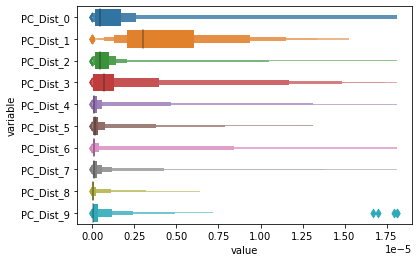

In [8]:
pc_distplot(pca, cols = np.arange(0,10))

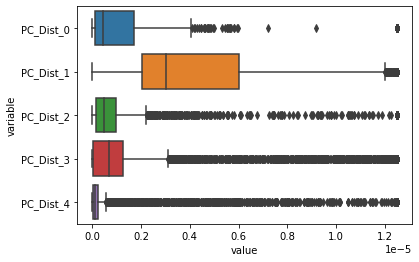

In [9]:
pc_distplot(pca, upper_limit = 1.25e-5, my_function = sns.boxplot)

### Save Plots for All 100 PC Distributions to a pdf

In [10]:
pc_distplot_pdf('pcqc_100_dist.pdf',pca)

### Compute Stats from these Distributions

In [11]:
pca.pc_stats()

In [32]:
pca.df_pc_stats.head(20).sort_values(by = '90.0_Percentile',ascending = False)

,85.0_Percentile,90.0_Percentile,95.0_Percentile,evalue,rank
PC_Dist_1,8.601626e-06,1.014885e-05,1.210442e-05,0.039169,2.0
PC_Dist_3,2.813921e-06,7.694347e-06,1.292536e-05,0.017787,4.0
PC_Dist_0,2.311926e-06,2.936726e-06,9.714711e-05,0.065629,1.0
PC_Dist_2,1.285693e-06,1.547341e-06,2.749509e-06,0.026914,3.0
PC_Dist_9,9.158598e-07,1.511348e-06,3.181929e-06,0.005146,10.0
PC_Dist_5,5.801629e-07,1.427605e-06,5.020880e-06,0.013409,6.0
PC_Dist_4,4.296442e-07,9.569372e-07,6.487841e-06,0.015314,5.0
PC_Dist_7,4.446319e-07,7.045018e-07,1.570855e-06,0.006906,8.0
PC_Dist_16,3.702320e-07,6.042770e-07,1.083304e-06,0.001905,17.0
PC_Dist_15,4.147513e-07,5.718364e-07,9.152589e-07,0.002142,16.0


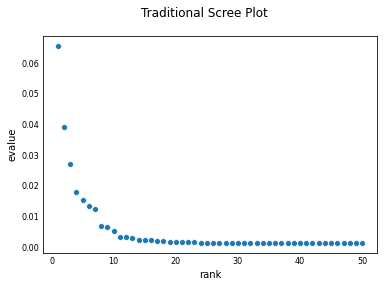

In [13]:
scatter_scree_plot(pca)

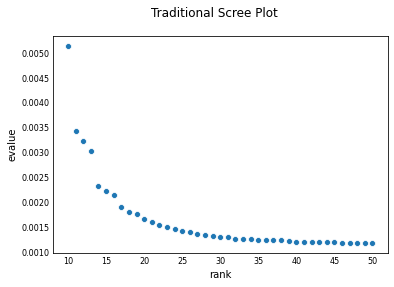

In [14]:
scatter_scree_plot(pca, rank = np.arange(10,51))

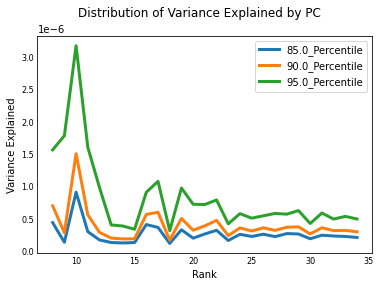

In [15]:
fig = dist_var_pc_plot(pca, rank = np.arange(8,35))

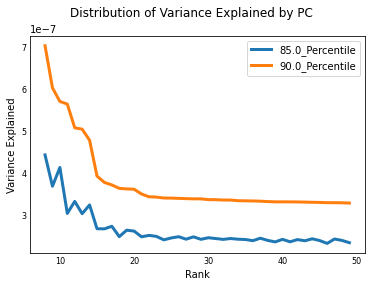

In [16]:
fig = sorted_dist_var_pc_plot(pca, rank = np.arange(8,50), sort_var = '90.0_Percentile', max_subset_size = 2)

In [18]:
#save file
file = open('pcqc_pca.pkl','wb')
pickle.dump(pca,file)

### PCA and Clustering- How does this happen?
1. New diagnostic for checking which PC's to use.  After forming the clusters, does the PC cause separation?
2. Univariate scaling will not fix cluster size imbalances if that gene is expressed with other clusters.  (Gene musical chairs).  A cluster shares connections with other clusters but the aggregated information on gene expression provides a good description of the tiny cluster,

In [19]:
pca.select_top_pcs(criteria = '90.0_Percentile', n_top_pcs = 30)
reduced_matrix = pca.use_top_pcs()

In [20]:
reduced_matrix.shape

(8617, 30)

In [25]:
my_data = sc.AnnData(X = reduced_matrix)

In [26]:
sc.pp.neighbors(my_data, n_neighbors=20, n_pcs=0)

In [28]:
sc.tl.leiden(my_data)

In [39]:
my_data.obs['leiden'].values

[5, 5, 5, 5, 5, ..., 8, 4, 0, 11, 11]
Length: 8617
Categories (18, object): [0, 1, 2, 3, ..., 14, 15, 16, 17]

In [34]:
dim_pca = pd.DataFrame(reduced_matrix)

In [40]:
dim_pca['leiden'] = my_data.obs['leiden'].values

In [41]:
dim_pca

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,leiden
0,-3.420900,-0.405907,-35.409046,-0.632037,0.597867,1.232025,0.241055,0.559510,-0.332302,-0.254633,...,-0.048033,-0.003149,0.224332,0.508273,0.657819,-0.412979,0.129316,-0.209431,-0.034907,5
1,-3.912628,0.106345,-34.996133,-2.277856,-0.445931,4.279818,-0.712076,0.621572,0.003258,-1.483568,...,0.307387,-0.368245,-0.102243,0.310370,0.719463,0.435177,0.044646,-0.368926,0.651441,5
2,-3.944900,-0.540257,-35.866303,-1.630318,-0.151820,2.093959,0.546472,0.470358,0.269484,-0.330555,...,-0.504869,-0.256724,0.006377,0.487912,0.265935,0.212950,0.360660,-0.257134,0.609993,5
3,-3.929127,-0.489489,-35.277363,-1.155128,-0.002920,2.148099,0.580445,0.266191,-0.105921,0.048056,...,0.244370,0.086808,-0.313475,0.083123,0.264988,0.298387,-0.180400,0.173358,0.058253,5
4,-3.277635,-0.049605,-34.193744,-1.682264,0.518898,1.543469,0.871571,0.184298,0.380560,-0.223120,...,0.517008,0.645024,0.212618,-0.478057,0.330187,0.008445,0.038708,-0.248511,0.369470,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,-7.694149,0.642784,5.229214,0.293987,5.831200,1.670764,-0.141287,1.310506,0.436513,0.776126,...,-1.465366,-0.673530,0.190992,1.228410,0.659854,-1.632049,0.931261,1.636509,-0.408044,8
8613,-8.988119,0.604435,3.770423,1.472363,-0.377177,-0.077005,1.441960,-0.641451,3.060648,1.792368,...,1.671637,-1.364464,2.163647,0.660757,1.069508,0.679017,-0.729208,0.990340,0.344688,4
8614,-0.201929,-0.909339,-7.831272,0.271584,-0.066349,0.297784,-1.101202,-0.237368,-0.713183,-0.651861,...,0.966596,-0.152774,0.020627,3.575400,-1.165304,-0.055349,-0.479543,0.978719,2.766318,0
8615,-3.989666,-1.435563,-14.670133,-1.016858,-0.172915,2.669156,0.412732,-1.970797,-1.349839,-0.090411,...,0.198761,-0.220012,-1.335292,0.349950,0.633122,-0.429104,-2.001541,-0.430021,0.856421,11


In [53]:
dim_pca.groupby('leiden').quantile([.25,.5,.75]).iloc[[0,1,2,18,19,20],0:12]

0         1         2         3         4         5   \
leiden                                                                    
0      0.25  4.643091  2.832880  0.577044  2.546816 -0.345601 -1.717912   
       0.50  5.034564  3.193794  0.994104  3.168275  0.012540 -1.330163   
       0.75  5.422719  3.569993  1.378523  3.708100  0.438785 -0.908546   
6      0.25  5.561397  2.293580  1.025640  0.337710  0.049357 -0.975705   
       0.50  6.044423  2.775420  1.451185  1.824096  0.522503 -0.400851   
       0.75  6.763482  3.300767  1.897750  2.616645  1.118544  0.250727   

                   6         7         8         9         10        11  
leiden                                                                   
0      0.25  0.584370 -0.133976 -0.353362  0.093397 -0.559088 -0.206334  
       0.50  0.986491  0.336475  0.021798  0.689384 -0.191864  0.399644  
       0.75  1.362428  0.796435  0.397580  1.338178  0.183994  1.041637  
6      0.25  0.098827  0.908806 -0.847813 -2.646537  0.191210  1.826122  
       0.50  0.626502  1.599138 -0.449619 -1.592718  0.635547  3.262863  
       0.75  1.133691  2.569073 -0.102465 -0.662564  1.119018  4.509292

In [58]:
from sklearn.metrics.pairwise import euclidean_distances 

#### Analyzing Cluster Centroids
1. Note the similarity in centroids between clusters 0,2 and 6.
2. When adding the 12th best PC (according to PCQC) there is much greater separation between these clusters

In [62]:
euclidean_distances(dim_pca.groupby('leiden').mean().iloc[:,0:11])[6,:]

array([ 4.18691992, 16.58344322,  2.61639462, 15.0988985 , 18.30317941,
       37.48369793,  0.        , 12.69661448, 19.07695069, 11.04010682,
       16.47122506, 33.60774527, 31.14962415, 42.25483812, 35.83110777,
       23.26018138, 23.69806939, 29.6235142 ])

In [61]:
euclidean_distances(dim_pca.groupby('leiden').mean().iloc[:,0:12])[6,:]

array([ 4.97807481, 16.87504516,  5.33455178, 15.4033669 , 18.56368121,
       37.61696841,  0.        , 13.1098741 , 19.31706543, 11.36640429,
       16.82376431, 33.75355771, 31.31308217, 42.3778758 , 35.99430443,
       23.49027708, 23.96947062, 29.99785146])

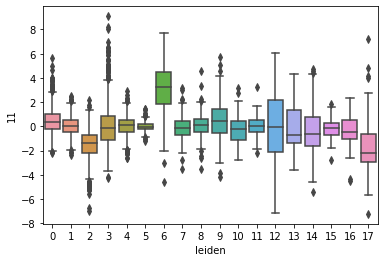

In [46]:
#get distribution of each pca
sns.boxplot(x = 'leiden', y = 11, data = dim_pca)

In [63]:
from matplotlib.backends.backend_pdf import PdfPages

In [67]:
#another way to verify that you chose correct PC's after clustering.
#a good PC should be able to highlight differences between clusters.
#save distribution of each pca to pdf
with PdfPages('pc_cluster_dist.pdf') as pdf:
    for i in range(30):
        sns.boxplot(x = 'leiden', y = i, data = dim_pca)
        plt.title('PC Value Distribution by Leiden Cluster, PC ' + str(i))
        plt.tight_layout()
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

Note that only PC 11 (in pcqc ranking) distringuishes Cluster 2 from Cluster 6.  From PC 13 and onwards, we don't see significant separation between the clusters.

### Identify the Variables that Contribute most to PC11

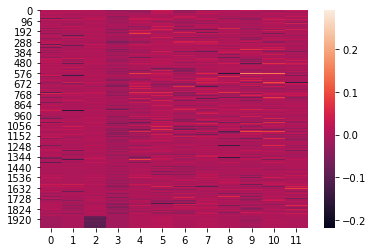

In [71]:
sns.heatmap(pca.right_PCs[pca.best_pcs[0:12],:].transpose())

In [ ]:
pca.right_PCs[pca.best_pcs[0:12],:].transpose()

In [74]:
pc_vars = pd.DataFrame(pca.right_PCs[pca.best_pcs[0:12],:].transpose())

In [83]:
pc_vars.quantile([.01,.1,.5,.9,.99])

,0,1,2,3,4,5,6,7,8,9,10,11
0.01,-0.095558,-0.125128,-0.096393,-0.066028,-0.065259,-0.089301,-0.072686,-0.081419,-0.086054,-0.066044,-0.071123,-0.061509
0.10,-0.020490,-0.013459,-0.003096,-0.037005,-0.018188,-0.019949,-0.030017,-0.019669,-0.019007,-0.030560,-0.018075,-0.019814
0.50,0.001267,-0.000507,0.001666,-0.013124,-0.000001,0.003162,-0.001449,0.002495,0.000167,-0.002742,0.001415,-0.000344
0.90,0.017214,0.009805,0.011758,-0.000252,0.022794,0.022932,0.018784,0.024768,0.016054,0.016607,0.021732,0.015656
0.99,0.038799,0.034468,0.025024,0.012819,0.082699,0.056014,0.054684,0.052250,0.070023,0.052541,0.062637,0.062163


In [84]:
pc_vars.sort_values(by = 11, ascending = False)

,0,1,2,3,4,5,6,7,8,9,10,11
275,0.019003,0.017714,0.002099,0.008670,0.009696,-0.007423,0.006112,0.026521,-0.027971,-0.094031,0.013535,0.290162
274,0.020388,-0.030549,0.002585,0.006387,0.007012,0.005329,0.002220,0.017142,-0.029119,-0.082572,0.014810,0.217384
694,0.013417,-0.031581,0.001022,0.006548,-0.002778,0.004837,-0.000378,-0.004377,0.029410,-0.035663,0.017365,0.183095
1521,0.021539,0.025991,0.002480,0.011213,0.020251,-0.009589,0.006576,0.028818,-0.020938,-0.097463,0.023888,0.163952
322,0.036943,0.039719,0.004641,0.022433,0.011704,-0.017217,0.007821,0.029378,-0.009185,-0.009662,0.006474,0.116686
...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0.036242,0.046257,0.004206,0.020283,0.022787,-0.023062,0.014273,0.034099,0.015116,-0.066042,0.006168,-0.147122
1582,0.006533,0.024752,0.004777,-0.004215,0.007485,-0.034660,-0.005686,0.011446,0.016493,-0.021622,0.019773,-0.154684
559,0.016986,0.026609,0.003077,0.001270,0.011414,-0.010433,0.014435,0.013691,0.012664,-0.050019,0.009401,-0.156953
446,0.021764,0.031054,0.001800,0.013640,0.016651,-0.015870,0.010313,0.019250,0.012920,-0.053580,0.008311,-0.159849


In [85]:
top_pc_vars = [275,274,694,1521,322,1763,1582,559,446,1838]

In [86]:
cbmc_df.shape

(8617, 2000)

In [87]:
cbmc_subset = pd.DataFrame(cbmc_df.iloc[:,top_pc_vars])

In [91]:
cbmc_subset['leiden'] = dim_pca['leiden'].values

In [92]:
cbmc_subset

Unnamed: 0,CD8B,CD8A,GZMK,S100B,CHI3L2,TRAT1,SLC40A1,FAM13A,DACT1,USP10,leiden
CTGTTTACACCGCTAG,-0.209281,-0.193509,-0.138784,-0.265945,-0.419304,-0.385174,-0.307814,-0.236801,-0.227777,-0.354103,5
CTCTACGGTGTGGCTC,-0.209281,-0.193509,-0.138784,-0.265945,-0.419304,-0.385174,-0.307814,-0.236801,-0.227777,-0.354103,5
AGCAGCCAGGCTCATT,-0.209281,-0.193509,-0.138784,-0.265945,-0.419304,-0.385174,-0.307814,-0.236801,-0.227777,-0.354103,5
GAATAAGAGATCCCAT,-0.209281,-0.193509,-0.138784,0.422565,-0.419304,-0.385174,-0.307814,-0.236801,-0.227777,-0.354103,5
GTGCATAGTCATGCAT,-0.209281,-0.193509,1.170784,-0.265945,0.228269,-0.385174,-0.307814,-0.236801,-0.227777,-0.354103,5
...,...,...,...,...,...,...,...,...,...,...,...
TTGCCGTGTAGATTAG,-0.209281,-0.193509,-0.138784,-0.265945,-0.419304,-0.385174,-0.307814,-0.236801,-0.227777,3.272641,8
GGCGTGTAGTGTACTC,-0.209281,-0.193509,-0.138784,-0.265945,-0.419304,-0.385174,-0.307814,-0.236801,-0.227777,-0.354103,4
CGTATGCCGTCTTCTG,-0.209281,-0.193509,-0.138784,-0.265945,3.105091,-0.385174,-0.307814,-0.236801,-0.227777,-0.354103,0
TACACGACGCTCTTCC,-0.209281,-0.193509,-0.138784,-0.265945,-0.419304,-0.385174,-0.307814,-0.236801,-0.227777,-0.354103,11


In [93]:
cbmc_subset.groupby('leiden').mean()

Unnamed: 0,CD8B,CD8A,GZMK,S100B,CHI3L2,TRAT1,SLC40A1,FAM13A,DACT1,USP10
leiden,,,,,,,,,,
0,0.001855,-0.161762,-0.055543,0.075279,0.634660,0.265844,-0.046074,-0.074934,-0.019328,-0.108660
1,-0.203256,-0.184712,-0.120981,-0.244583,-0.378346,-0.367119,-0.064346,-0.161863,-0.213686,-0.156871
2,-0.159213,-0.182936,-0.095076,0.159227,0.115665,0.911051,0.546394,0.741124,0.849831,0.920743
3,-0.141840,0.459828,0.636842,-0.184514,-0.202948,-0.314299,-0.286458,-0.199991,-0.214646,-0.261582
4,-0.209281,-0.190263,-0.123535,-0.235246,-0.361039,-0.360322,-0.028496,-0.124259,-0.215673,-0.150210
5,-0.165989,-0.127271,-0.074492,-0.179864,-0.345840,-0.312753,-0.245003,-0.177183,-0.174042,-0.291631
6,2.862854,1.981121,0.080666,1.830716,0.822525,0.054642,-0.213156,-0.160603,-0.076648,-0.162066
7,-0.191496,-0.178058,-0.097454,-0.226173,-0.057194,-0.318662,-0.252148,-0.202043,-0.204811,-0.273431
8,-0.136716,-0.135476,-0.138784,-0.205636,-0.394191,-0.328365,-0.227266,-0.193430,-0.204309,-0.296809


In [100]:
#idea for code, weight genes by eigenvector entries
#plot distributions for each cluster
with PdfPages('gene_cluster_dist.pdf') as pdf:
    for i in range(10):
        sns.boxenplot(x = 'leiden', y = cbmc_subset.columns[i], data = cbmc_subset)
        factor = pc_vars.loc[top_pc_vars[i],11]
        plt.title('Gene Distribution ' + cbmc_subset.columns[i] + ' PC 11 Factor ' + str(np.round(factor,2)))
        plt.tight_layout()
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

In [95]:
pc_vars.loc[top_pc_vars[0],11]

0.2901621390813621

In [101]:
#Genes are expressed in other clusters.  PAGA representation idea works.  Cluster 6 shares common genes with 
#other clusters.  Univariate Normalization won't correct for cluster size imbalances as other clusters share that gene
#But the combination of genes described by the PC provides a unique signature for the small cluster (6).  